In [1]:
import pandas as pd

ds_w = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
ds_r = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
ds = pd.concat([ds_w,ds_r])

# How to model immbalanced dataset
# which model performs best
# how to do benchmarking
# conclusion
x=ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [2]:
ds['quality'] = pd.Categorical(ds['quality']) #why to change from int64 to Category? Ans:

In [3]:
x=ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null category
dtypes: category(1), float64(11)
memory usage: 615.8 KB


In [4]:
set(ds.quality)

{3, 4, 5, 6, 7, 8, 9}

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

sns.distplot(ds["fixed acidity"])

/home/manoj/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


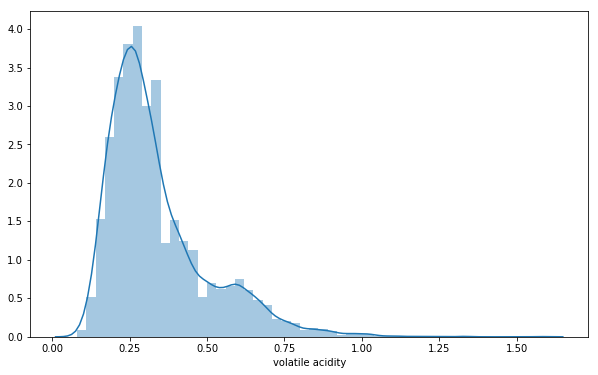

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(ds["volatile acidity"])

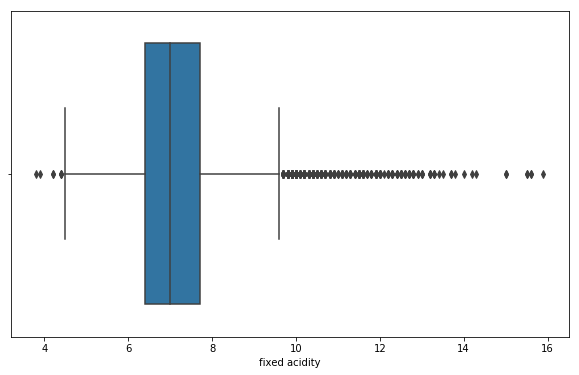

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(ds["fixed acidity"])

In [8]:
import numpy as np
X = ds.drop(columns=['quality']).as_matrix()
y = np.array(ds['quality'])

/home/manoj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
y

array([6, 6, 6, ..., 6, 5, 6])

In [10]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.20,random_state=1234)

In [11]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
lm.fit(Xtrain,Ytrain)


/home/manoj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/manoj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
lm.predict(Xtest)


array([6, 7, 6, ..., 6, 5, 6])

In [14]:
lm.score(Xtrain,Ytrain)


0.5304983644410237

In [15]:
lm.score(Xtest,Ytest)

0.56

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
pred_quality = lm.predict(Xtest)

In [17]:
confusion_matrix(Ytest,pred_quality)

array([[  0,   0,   3,   4,   0,   0,   0],
       [  0,   0,  31,  13,   1,   0,   0],
       [  0,   0, 271, 159,   0,   0,   0],
       [  0,   0, 119, 442,  14,   0,   0],
       [  0,   0,  15, 178,  15,   0,   0],
       [  0,   0,   3,  27,   4,   0,   0],
       [  0,   0,   0,   1,   0,   0,   0]])

In [18]:
print(classification_report(Ytest,pred_quality))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        45
           5       0.61      0.63      0.62       430
           6       0.54      0.77      0.63       575
           7       0.44      0.07      0.12       208
           8       0.00      0.00      0.00        34
           9       0.00      0.00      0.00         1

   micro avg       0.56      0.56      0.56      1300
   macro avg       0.23      0.21      0.20      1300
weighted avg       0.51      0.56      0.50      1300



/home/manoj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/manoj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/manoj/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
lm2 = LogisticRegression()

In [20]:
#from numba import cuda
#@cuda.jit(nopython=False)
def GridSearch_BestParam(X, y, clf, param_grid,cv):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_score=grid_search.best_score_
    top_params=grid_search.best_params_  #grid_search.grid_scores_ old new is best_score_
    total_time = time() - start
    return top_score,top_params,total_time

In [21]:
lm2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
param_grid = {"C":[0.001,0.05,0.1],
              'solver':['newton-cg','lbfgs','liblinear']
                 }

In [23]:
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter

In [24]:
import warnings; warnings.simplefilter('ignore')
top_para = GridSearch_BestParam(Xtrain,Ytrain,lm2,param_grid,10)
print(top_para)

(0.5314604579565134, {'C': 0.1, 'solver': 'newton-cg'}, 37.99880051612854)


In [26]:
top_para

(0.5314604579565134, {'C': 0.1, 'solver': 'newton-cg'}, 37.99880051612854)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()

In [29]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dt.score(Xtrain,Ytrain)

1.0

In [32]:
dt.score(Xtest,Ytest)

0.6207692307692307

In [33]:
param_grid={"criterion": ["gini","entropy"],
           "min_samples_split":[10,20],  #use min 30 in real project
           "max_depth": [2,5,7,10],
           "min_samples_leaf":[10]
           }

In [34]:
top_para = GridSearch_BestParam(Xtrain,Ytrain,dt,param_grid,cv=10)
print(top_para)

(0.5372330190494516, {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 10}, 2.7839746475219727)


In [35]:
dt.feature_importances_

array([0.07625029, 0.10291683, 0.0845939 , 0.06752385, 0.06599916,
       0.08747843, 0.1070368 , 0.07853717, 0.09970826, 0.08544008,
       0.14451522])

In [36]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_jobs=-1)
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
import numpy as np

In [39]:
np.sqrt(11)

3.3166247903554

In [40]:
model_rf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
model_rf.score(Xtrain,Ytrain)

0.9849913411583606

In [42]:
model_rf.score(Xtest,Ytest)

0.6746153846153846

In [43]:
model_rf1 = RandomForestClassifier(max_features=2,criterion="entropy",n_estimators=50,n_jobs=-1)

In [44]:
model_rf1.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
model_rf1.score(Xtrain,Ytrain)

1.0

In [46]:
model_rf1.score(Xtest,Ytest)

0.6961538461538461

In [47]:
param_grid={"criterion":["gini","entropy"],
           "max_features":[3,4],
           "max_depth":[3,4,5,7],
           "n_estimators":[300,200,400,100]}

In [48]:
top_para = GridSearch_BestParam(Xtrain,Ytrain,model_rf,param_grid,cv=10)

In [54]:
model_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
top_para

(0.5826438329805657,
 {'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'n_estimators': 100},
 485.55339765548706)

In [56]:
model_rf_bf= RandomForestClassifier(max_features=3,criterion="gini",n_estimators=100,max_depth=7,n_jobs=-1)

In [57]:
model_rf_bf.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
model_rf_bf.score(Xtrain,Ytrain)

0.6463344237059843

In [59]:
model_rf_bf.score(Xtest,Ytest)

0.5953846153846154

In [60]:
model_rf_bf= RandomForestClassifier(max_features=4,criterion="entropy",n_estimators=300,max_depth=7,n_jobs=-1)

In [61]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [62]:
abc = AdaBoostClassifier()
abc

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [63]:
gbc=GradientBoostingClassifier()
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [64]:
abc.fit(Xtrain,Ytrain)
print(abc.score(Xtrain,Ytrain))
print(abc.score(Xtest,Ytest))

0.48624206272849724
0.4969230769230769


In [65]:
gbc.fit(Xtrain,Ytrain)
print(gbc.score(Xtrain,Ytrain))
print(gbc.score(Xtest,Ytest))

0.7082932461035213
0.6084615384615385


## XGBoost

In [1]:
import numpy as np

from sklearn.datasets import load_svmlight_files
from sklearn.metrics import accuracy_score

from xgboost.sklearn import XGBClassifier

In [28]:
params = {
    #'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 1.0,
    'silent': 1.0,
    'n_estimators': 5
}

In [29]:
bst = XGBClassifier(**params).fit(Xtrain, Ytrain)

In [30]:
preds = bst.predict(Xtest)
preds

array([6, 7, 6, ..., 6, 5, 6], dtype=int64)

In [31]:
correct = 0

for i in range(len(preds)):
    if (Ytest[i] == preds[i]):
        correct += 1
        
acc = accuracy_score(Ytest, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-acc))

Predicted correctly: 737/1300
Error: 0.4331


In [43]:
params = {
    #'objective': 'binary:logistic',
    #'max_depth': [2,3,4,5],
    'learning_rate': [0.05,0.5,0.7,0.85,1.0],
    'silent': [1.0],
    'n_estimators': [3,4,5]
}

In [44]:
top_para = GridSearch_BestParam(Xtrain,Ytrain,bst,params,cv=10)
print(top_para)

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


(0.5535886088127766, {'learning_rate': 1.0, 'n_estimators': 5, 'silent': 1.0})


In [ ]:
from sklearn import svm, model_selection

classifier = svm.SVC()
dfs=["ovr","ovo"]
#kernels=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
k=['linear']
g = np.logspace(-5, -0.5, 20)
Cs = np.logspace(-1, 1, 3)
cv = model_selection.KFold(n_splits=10, shuffle=True,random_state=0)
paramgrids={"gamma": g,"C": Cs,"decision_function_shape": dfs,"kernel" : k}
gs = model_selection.GridSearchCV(classifier,param_grid=paramgrids,cv=cv,  n_jobs=7)
gs.fit(Xtrain, Ytrain)
print ('Best parameters:', gs.best_params_)
print ('Best score:', gs.best_score_)

In [29]:
from sklearn import svm, model_selection
#from numba import jit

#@jit()
def runGS_CV():
    classifier = svm.SVC()
    #dfs=["ovr","ovo"]
    #kernels=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    k=['rbf']
    g = np.logspace(-5, -0.5)
    Cs = np.logspace(-1, 1)
    cv = model_selection.KFold(n_splits=10, shuffle=True,random_state=0)
    paramgrids={"gamma": g,"C": Cs,
                #"decision_function_shape": dfs,
                "kernel" : k}
    gs = model_selection.GridSearchCV(classifier,param_grid=paramgrids,cv=cv,  n_jobs=3)
    gs.fit(Xtrain, Ytrain)
    print ('Best parameters:', gs.best_params_)
    print ('Best score:', gs.best_score_)

In [30]:
import time
now=time.time()
runGS_CV()
end = time.time() - now

KeyboardInterrupt: 

In [16]:
estimator.get_params().keys()

NameError: name 'estimator' is not defined

In [15]:
from numba import jit
help(jit)

Help on function jit in module numba.decorators:

jit(signature_or_function=None, locals={}, target='cpu', cache=False, pipeline_class=None, **options)
    This decorator is used to compile a Python function into native code.
    
    Args
    -----
    signature:
        The (optional) signature or list of signatures to be compiled.
        If not passed, required signatures will be compiled when the
        decorated function is called, depending on the argument values.
        As a convenience, you can directly pass the function to be compiled
        instead.
    
    locals: dict
        Mapping of local variable names to Numba types. Used to override the
        types deduced by Numba's type inference engine.
    
    target: str
        Specifies the target platform to compile for. Valid targets are cpu,
        gpu, npyufunc, and cuda. Defaults to cpu.
    
    pipeline_class: type numba.compiler.BasePipeline
            The compiler pipeline type for customizing the compilatio

In [1]:
from numba import cuda
print(cuda.gpus)

<Managed Device 0>


In [15]:
from sklearn import svm, model_selection
from numba import cuda

@cuda.jit()
def runGS_CV_Cuda():
    classifier = svm.SVC()
    dfs=["ovr","ovo"]
    #kernels=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
    k=['linear']
    g = np.logspace(-5, -0.5, 20)
    Cs = np.logspace(-1, 1, 3)
    cv = model_selection.KFold(n_splits=10, shuffle=True,random_state=0)
    paramgrids={"gamma": g,"C": Cs,"decision_function_shape": dfs,"kernel" : k}
    gs = model_selection.GridSearchCV(classifier,param_grid=paramgrids,cv=cv,  n_jobs=7)
    gs.fit(Xtrain, Ytrain)
    print ('Best parameters:', gs.best_params_)
    print ('Best score:', gs.best_score_)

SyntaxError: invalid syntax (<ipython-input-15-27ca7914b1f1>, line 6)

In [14]:
runGS_CV_Cuda()

UnsupportedError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUnsupported op-code encountered: build_map(items=[(Var($0.33, <ipython-input-13-eda4ae7bb09c> (13)), Var(g, <ipython-input-13-eda4ae7bb09c> (10))), (Var($0.34, <ipython-input-13-eda4ae7bb09c> (13)), Var(Cs, <ipython-input-13-eda4ae7bb09c> (11))), (Var($0.35, <ipython-input-13-eda4ae7bb09c> (13)), Var(dfs, <ipython-input-13-eda4ae7bb09c> (7))), (Var($0.36, <ipython-input-13-eda4ae7bb09c> (13)), Var(k, <ipython-input-13-eda4ae7bb09c> (9)))], size=2)
[1m
File "<ipython-input-13-eda4ae7bb09c>", line 13:[0m
[1mdef runGS_CV_Cuda():
    <source elided>
    cv = model_selection.KFold(n_splits=10, shuffle=True,random_state=0)
[1m    paramgrids={"gamma": g,"C": Cs,"decision_function_shape": dfs,"kernel" : k}
[0m    [1m^[0m[0m
[0m

In [25]:
ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
